# Landcover Data Preprocessing

In [24]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

from config import raw_files, processed_files, pre_merge_files

ImportError: cannot import name 'pre_merge_files' from 'config' (/home/b-fatma/m2/dm/project/config.py)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas

In [15]:
from shapely import wkt

filepath = processed_files["landcover"]
df = pd.read_csv(filepath)

# Convert 'geometry' column from WKT string to shapely geometry
df['geometry'] = df['geometry'].apply(wkt.loads)

gdf = geopandas.GeoDataFrame(df, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)  

,ID,GRIDCODE,AREA,LCCCODE,geometry
0,4,210,6.228187e+06,7001 // 8001,"POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6..."
1,2,210,6.242408e+06,7001 // 8001,"POLYGON ((7.18084 37.07917, 7.17998 37.08091, ..."
2,1,210,1.482995e+06,7001 // 8001,"POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7..."
3,8,50,4.590841e+08,21497-121340,"POLYGON ((6.12361 36.68472, 6.12361 36.69306, ..."
4,13,210,6.371533e+06,7001 // 8001,"POLYGON ((6.26181 37.02361, 6.26193 37.02514, ..."
...,...,...,...,...,...
438508,52055,201,1.646170e+05,6001,"POLYGON ((9.62361 30.27083, 9.62361 30.26806, ..."
438509,52058,200,1.482200e+05,0011,"POLYGON ((9.56891 30.2625, 9.57361 30.2625, 9...."
438510,52057,201,2.797149e+06,6001,"POLYGON ((9.57053 30.25694, 9.57083 30.25694, ..."
438511,52056,201,6.585450e+05,6001,"POLYGON ((9.62083 30.25972, 9.62083 30.25694, ..."


In [16]:
# gdf['centroid'] = gdf['geometry'].centroid

# gdf["longitude"] = gdf.centroid.map(lambda p: p.x)
# gdf["latitude"] = gdf.centroid.map(lambda p: p.y)

In [17]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 438513 entries, 0 to 438512
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ID        438513 non-null  int64   
 1   GRIDCODE  438513 non-null  int64   
 2   AREA      438513 non-null  float64 
 3   LCCCODE   438513 non-null  object  
 4   geometry  438513 non-null  geometry
dtypes: float64(1), geometry(1), int64(2), object(1)
memory usage: 16.7+ MB


<Axes: ylabel='LCCCODE'>

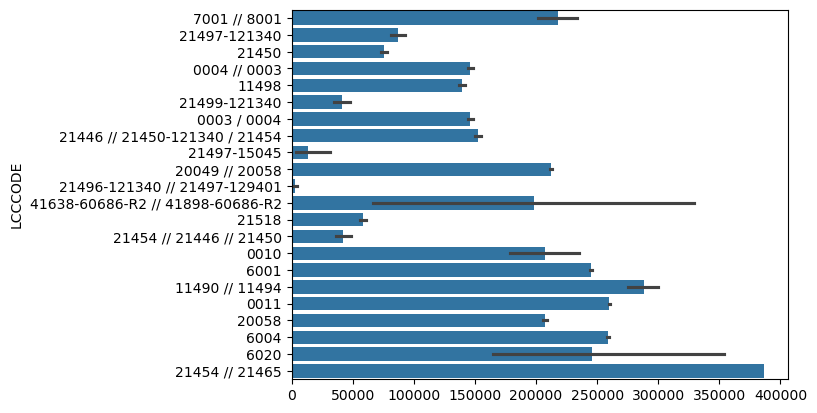

In [18]:
sns.barplot(gdf['LCCCODE'])

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

gdf['lcccode_label'] = le.fit_transform(gdf['LCCCODE'])

In [20]:
gdf.head()

,ID,GRIDCODE,AREA,LCCCODE,geometry,lcccode_label
0,4,210,6.228187e+06,7001 // 8001,"POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...",21
1,2,210,6.242408e+06,7001 // 8001,"POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...",21
2,1,210,1.482995e+06,7001 // 8001,"POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...",21
3,8,50,4.590841e+08,21497-121340,"POLYGON ((6.12361 36.68472, 6.12361 36.69306, ...",13
4,13,210,6.371533e+06,7001 // 8001,"POLYGON ((6.26181 37.02361, 6.26193 37.02514, ...",21


In [21]:
gdf.drop(columns=['ID', 'GRIDCODE', 'AREA', 'LCCCODE'], inplace=True)
gdf.head()

,geometry,lcccode_label
0,"POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...",21
1,"POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...",21
2,"POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...",21
3,"POLYGON ((6.12361 36.68472, 6.12361 36.69306, ...",13
4,"POLYGON ((6.26181 37.02361, 6.26193 37.02514, ...",21


In [ ]:
gdf.to_csv('../../data/pre-merge/landcover.csv', index=False)

manually assign codes to LCCCODEs